In [15]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [16]:
file = open("ex1data2.csv")
fileObject = csv.reader(file)
m = sum(1 for row in fileObject) # m = number of training examples

In [17]:
file = open("ex1data2.csv")
fileObject=csv.reader(file)
line = next(fileObject)
n = len(line)-1

X = np.zeros((m,n))
Y = np.zeros((m,1))

In [18]:
file = open("ex1data2.csv")
fileObject = csv.reader(file)
index = 0
for filerow in fileObject:
    for i in range(n):
        X[index,i]=filerow[i]
    
    Y[index]=filerow[-1]
    index=index+1
#print(X)
#print(Y)

In [19]:
#plt.scatter(X,Y)
#plt.xlabel("Population of a city")
#plt.ylabel("Profit of a food truck in that city")

In [20]:
def normfScaling(X):
    means = X.sum(axis=0)/X.shape[0]
    X=X-means
    sqDiff = np.square(X)
    variance = sqDiff.sum(axis=0)/X.shape[0]
    stdDev = np.sqrt(variance)
    print(stdDev)
    X= X/stdDev
    return X

    

In [21]:
def computeCost(X,Y,theta):
    m = X.shape[0]
    y_predicted = np.dot(X,theta)
    #print(y_predicted.shape)
    squaredError = np.square(np.subtract(y_predicted,Y))
    meanSquaredError = np.sum(squaredError)/(2*m)
    return meanSquaredError    

In [22]:
def calculateGradient(X,Y,theta):
    grad=np.zeros(np.shape(theta))
    error = np.dot(X,theta)- Y
    
  
    
    for i in range(theta.shape[0]):
        grad[i] = sum(error*np.reshape(X[:,i],(X[:,i].shape[0],1)))/m
    
    return grad

In [23]:
def updateParams(grad,theta,alpha):
    for i in range(theta.shape[0]):
        theta[i]=theta[i]-alpha*grad[i]
    return theta

In [24]:
def gradient_descent(X,Y,theta,alpha,iteration):
    it=np.arange(iteration)
    cost=np.empty((iteration,1),dtype=float)
    for i in range(iteration):
        cost[i]=computeCost(X,Y,theta)

        grad = calculateGradient(X,Y,theta)
        theta = updateParams(grad,theta,alpha)
    return theta,it,cost

In [25]:
def linear_regression(X,Y):
    m=X.shape[0]
    n=X.shape[1]
    
    X = normfScaling(X)
    
    X=np.c_[np.ones(m),X]
    theta = np.zeros((n+1,1))
    alpha=0.1
    iteration=500
    
    theta,it,cost = gradient_descent(X,Y,theta,alpha,iteration)
    
    print("final parameters:",theta)
    #plt.scatter(X[:,1],Y)
    #plt.plot(X[:,1],np.dot(X,theta),color='red')
    plt.plot(it,cost)
    return theta
    

In [26]:
def predict(X,theta):
    y_predict = np.dot(X,theta)
    return y_predict



[7.86202619e+02 7.52842809e-01]
final parameters: [[340412.65957447]
 [109447.79645983]
 [ -6578.35484435]]
[7.86202619e+02 7.52842809e-01]
X new: [[ 1.         -0.44604386 -0.22609337]]
[[293081.46433705]]


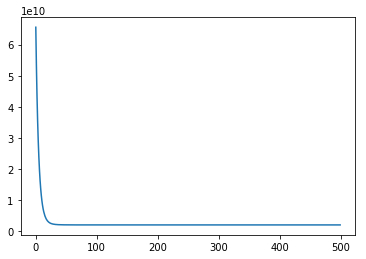

In [27]:
def meanstdv(X):
    means = X.sum(axis=0)/X.shape[0]
    X=X-means
    sqDiff = np.square(X)
    variance = sqDiff.sum(axis=0)/X.shape[0]
    stdDev = np.sqrt(variance)
    print(stdDev)
    X= X/stdDev
    return means,stdDev


theta=linear_regression(X,Y)



mean,stdDev = meanstdv(X)
X_new =np.array([[1650,3]])
X_new = X_new - mean
X_new = X_new/stdDev
m=1
X_new=np.c_[np.ones(m),X_new]
print("X new:",X_new)


predicted_value = predict(X_new,theta)
print(predicted_value)

In [28]:
from numpy.linalg import inv
m=X.shape[0]
X=np.c_[np.ones(m),X]

theta = np.dot(np.dot(inv(np.dot(X.T,X)),X.T),Y)
print(theta)

predicted_value = predict([[1,1650,3]],theta)
print(predicted_value)


[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
[[293081.4643349]]
